In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('D:\\all prOJECT\project sem 5\pract\data.csv' , names = ["10th" , "12th"  , "cgpa" , "automata" , "automata_fix" ,"computer sc","computer sc perc" , "writex" , "logitcal" ,  "logical perc" , "computer programming" , "computer programming perc" , "Quant" , "Quant perc" , "English" , "English Perc" , "total" , "y_label" ])

In [3]:
data.shape
data["total"] = data["total"].astype(float)
data["y_label"][data.total > 4500] = 1
data["y_label"][data.total <= 4500] = 0


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [4]:
data.shape


(1993, 18)

In [5]:
data.shape
data["total"] = data["total"].astype(float)
data["y_label"][data.total > 4500] = 1
data["y_label"][data.total <= 4500] = 0


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


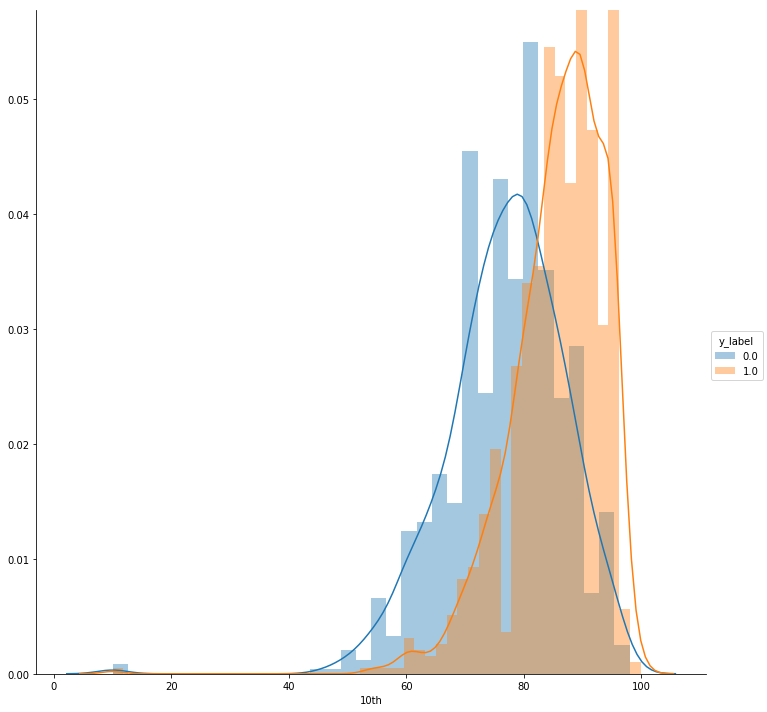

In [7]:
sns.FacetGrid(data , hue = "y_label", size = 10).map(sns.distplot, "10th").add_legend()
plt.show()

Observation
1.as the above univariate analysis says 10th data is helpful in prediction of y_labels
2.Those students who have more than 75% marks have greater chances of getting placed

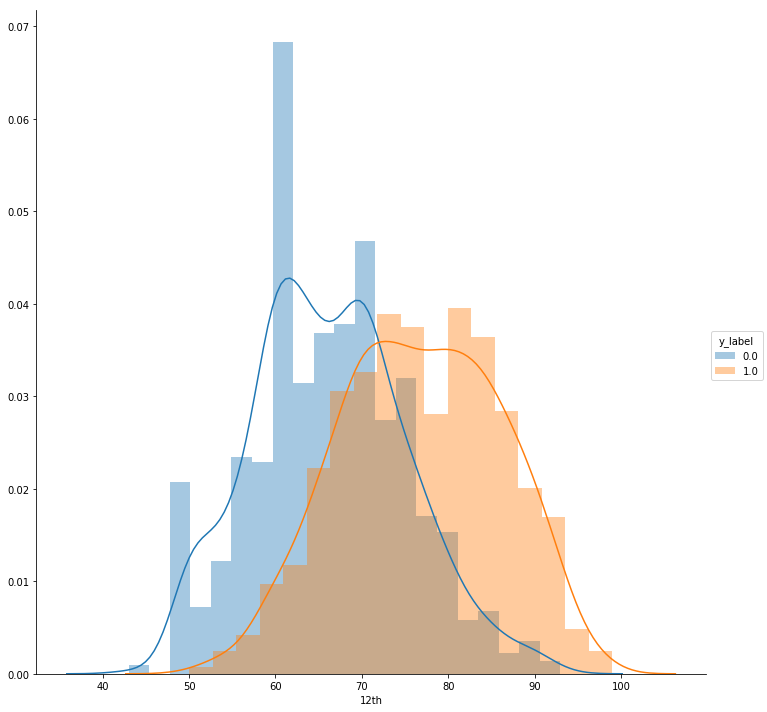

In [8]:
sns.FacetGrid(data , hue = "y_label", size = 10).map(sns.distplot, "12th").add_legend()
plt.show()

observation:
1. 12th percentage marks plays a significant role in the modeling
2. students who have greater than 65% marks are benifitted significantly

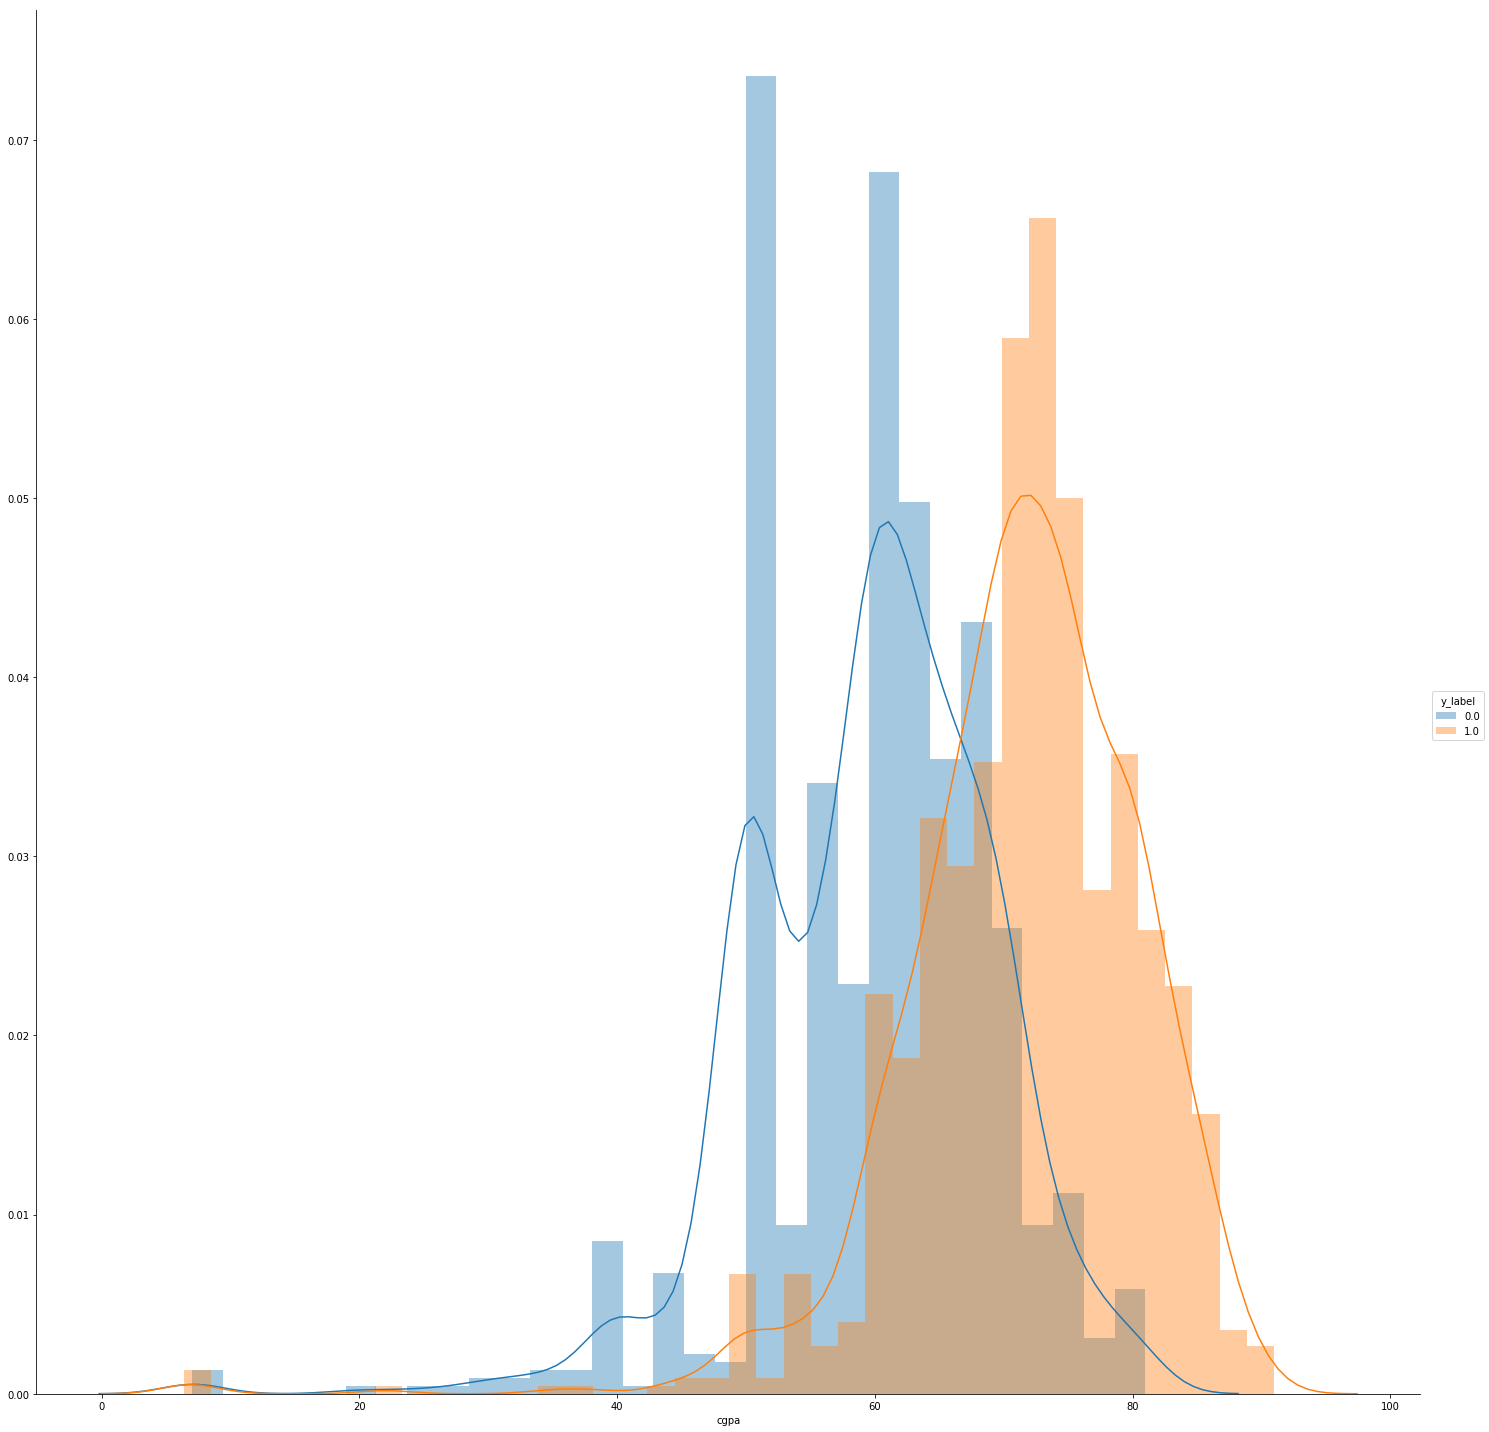

In [9]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "cgpa").add_legend()
plt.show()

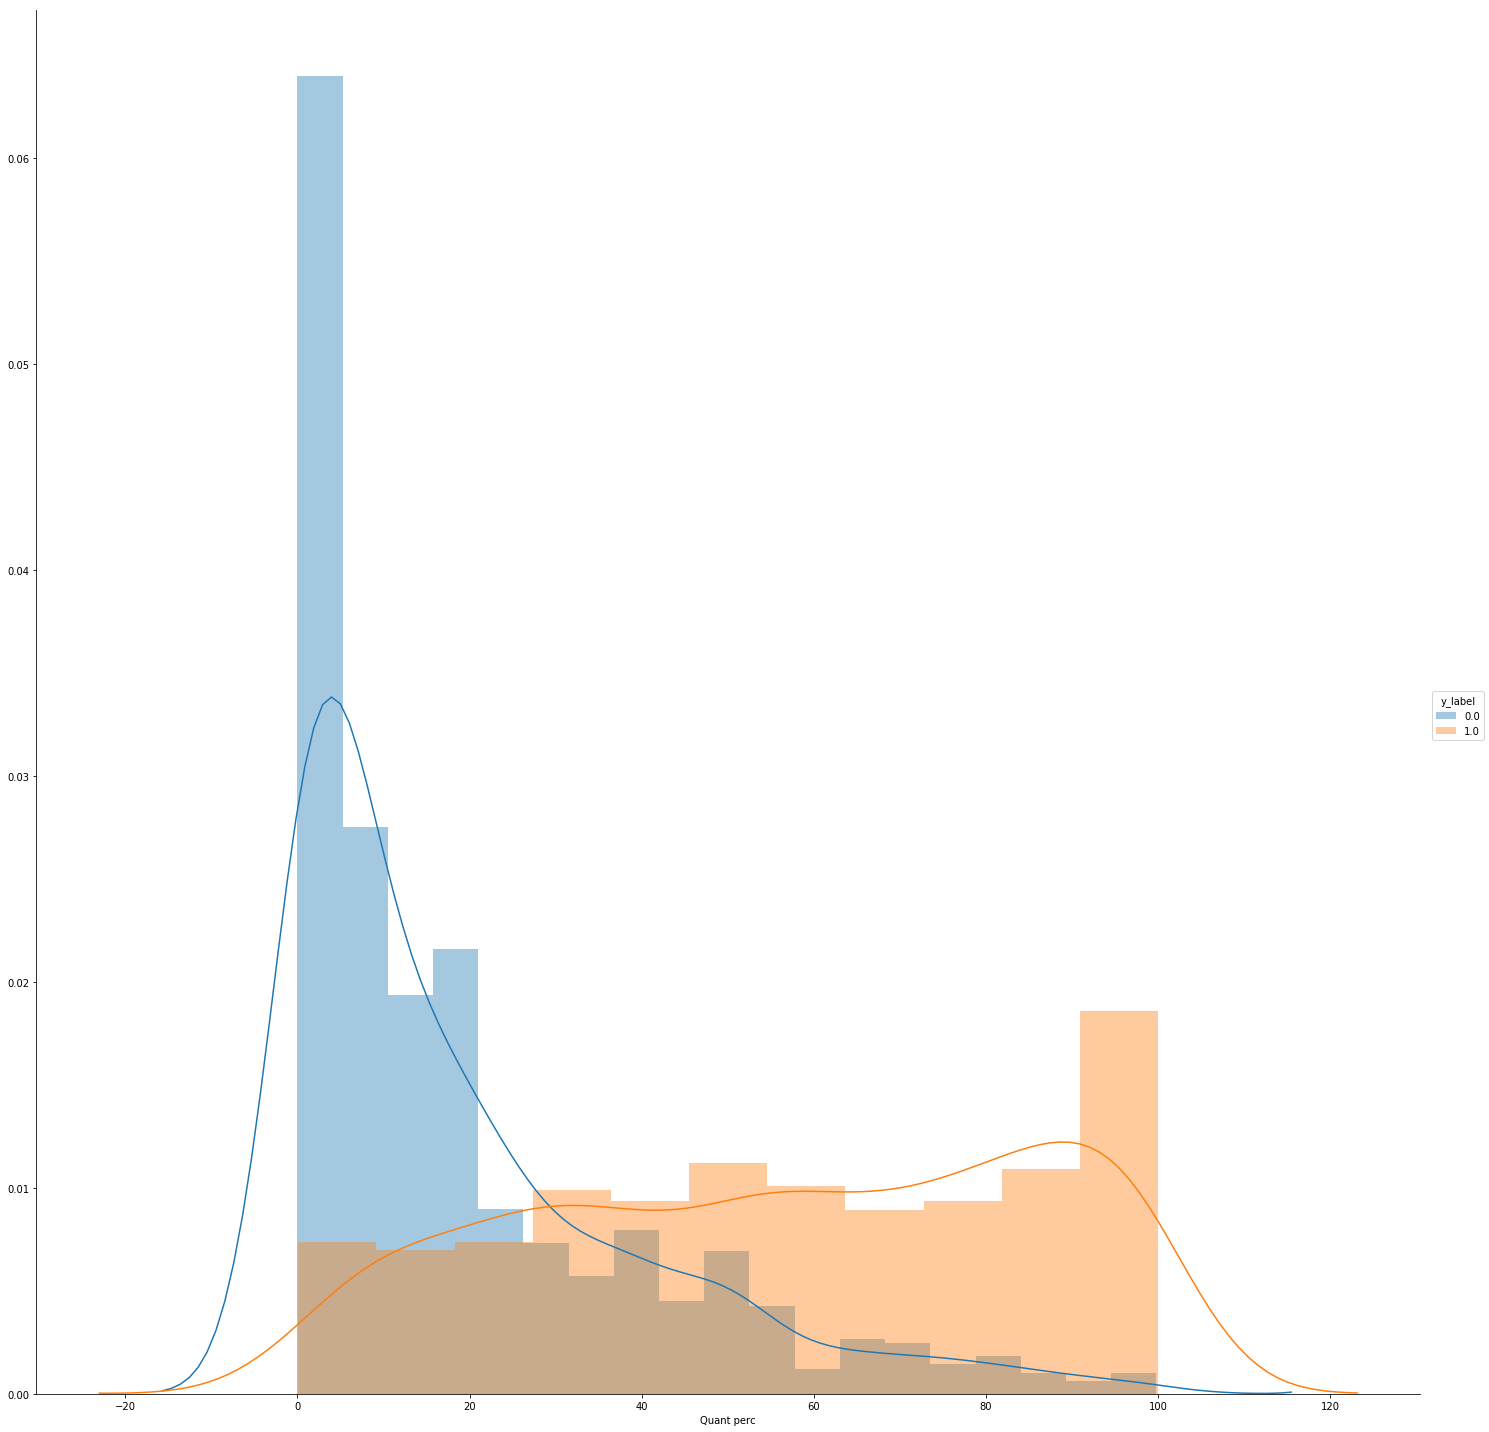

In [10]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "Quant perc").add_legend()
plt.show()

1. less precise in significant feature for prediction

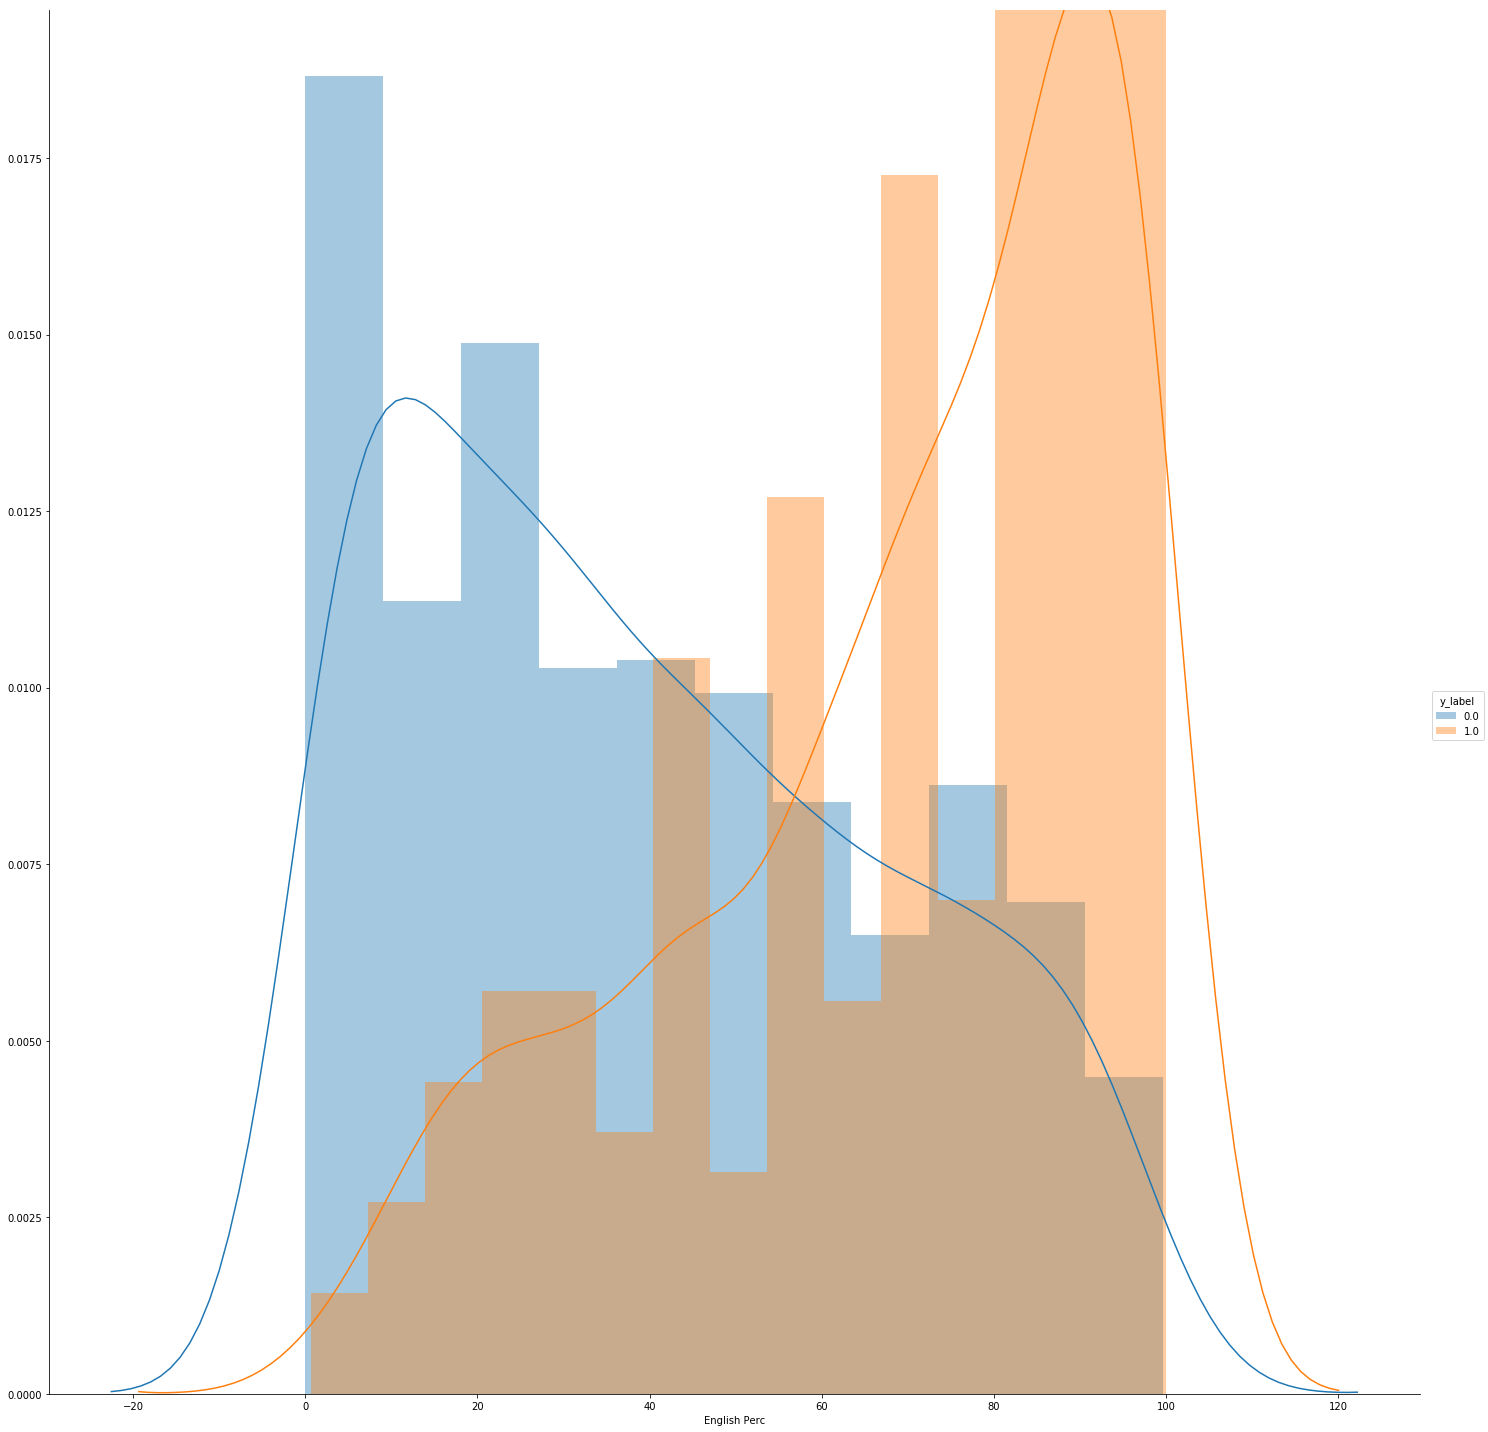

In [11]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "English Perc").add_legend()
plt.show()

1. less precise model hard to make sense out of it

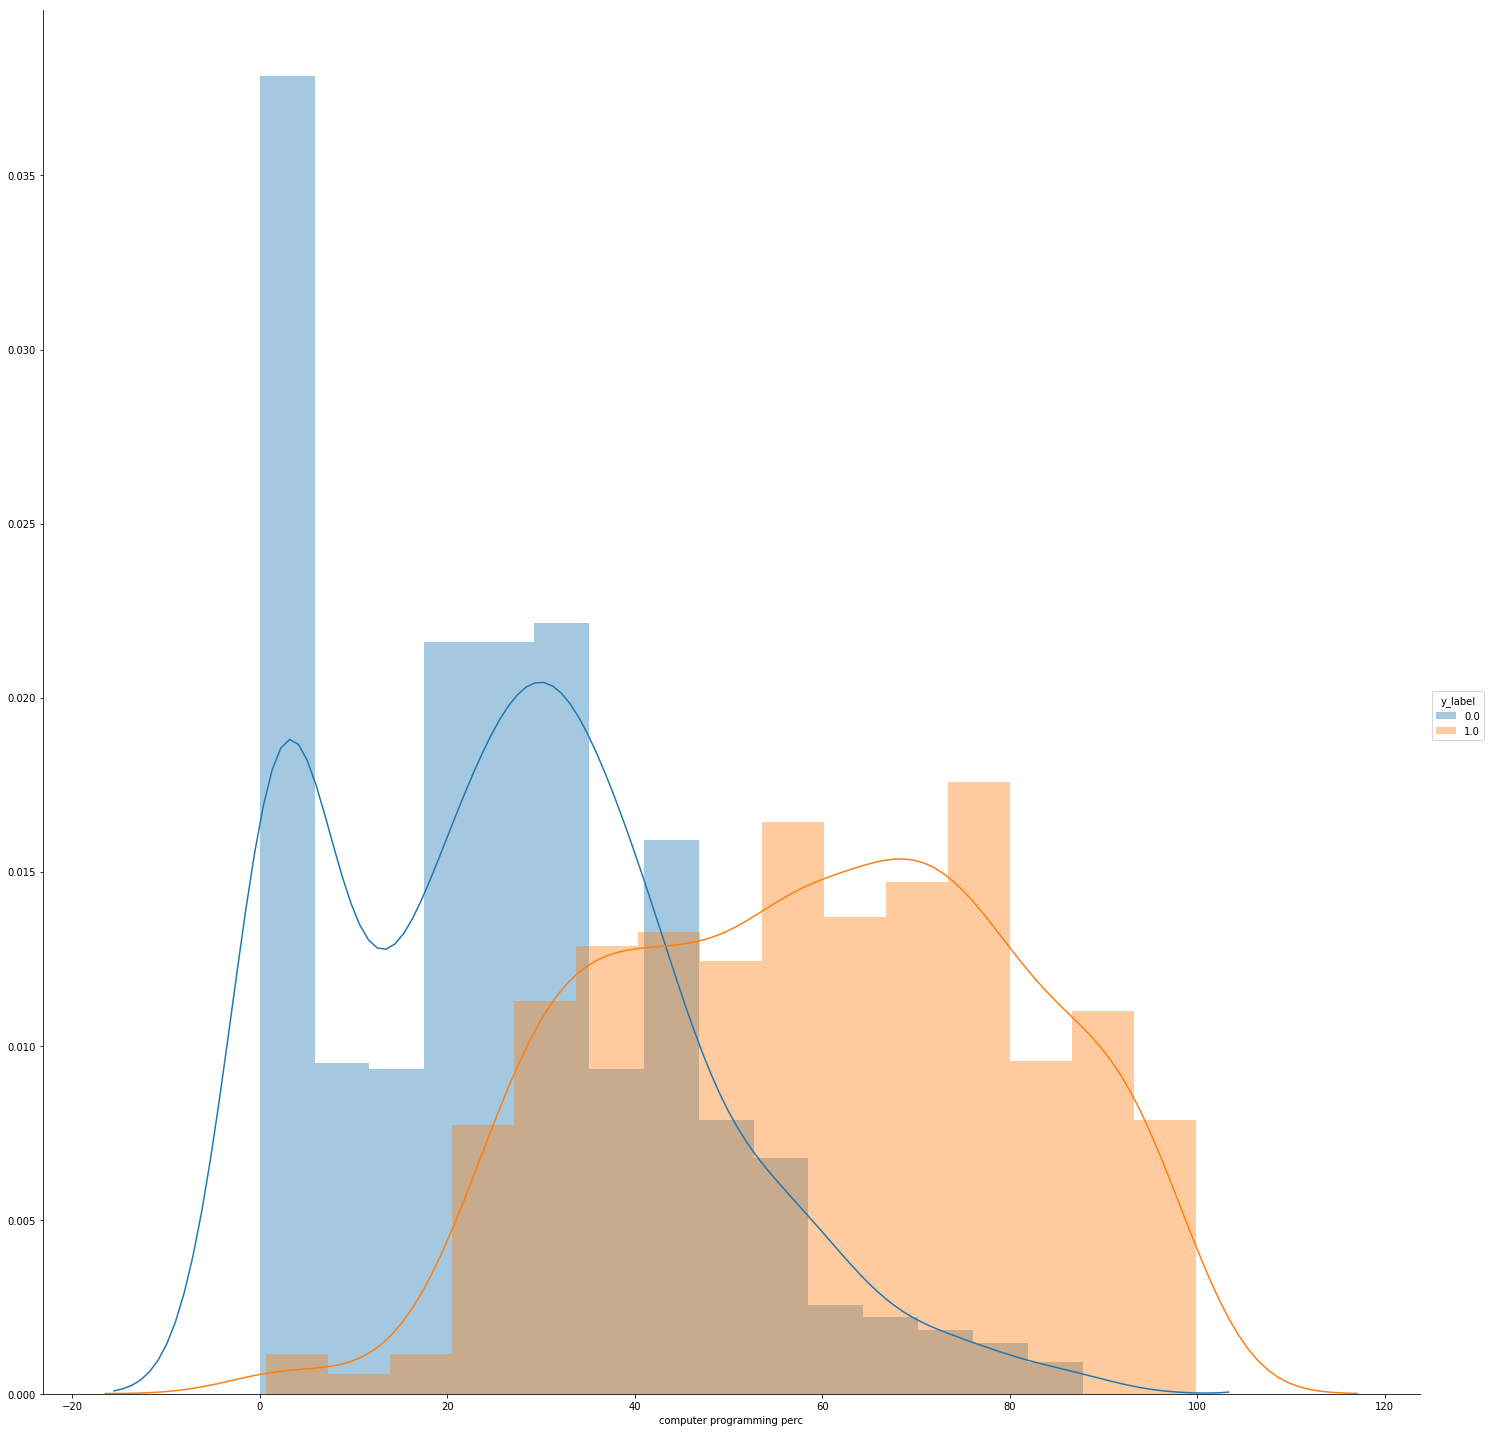

In [12]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "computer programming perc").add_legend()
plt.show()

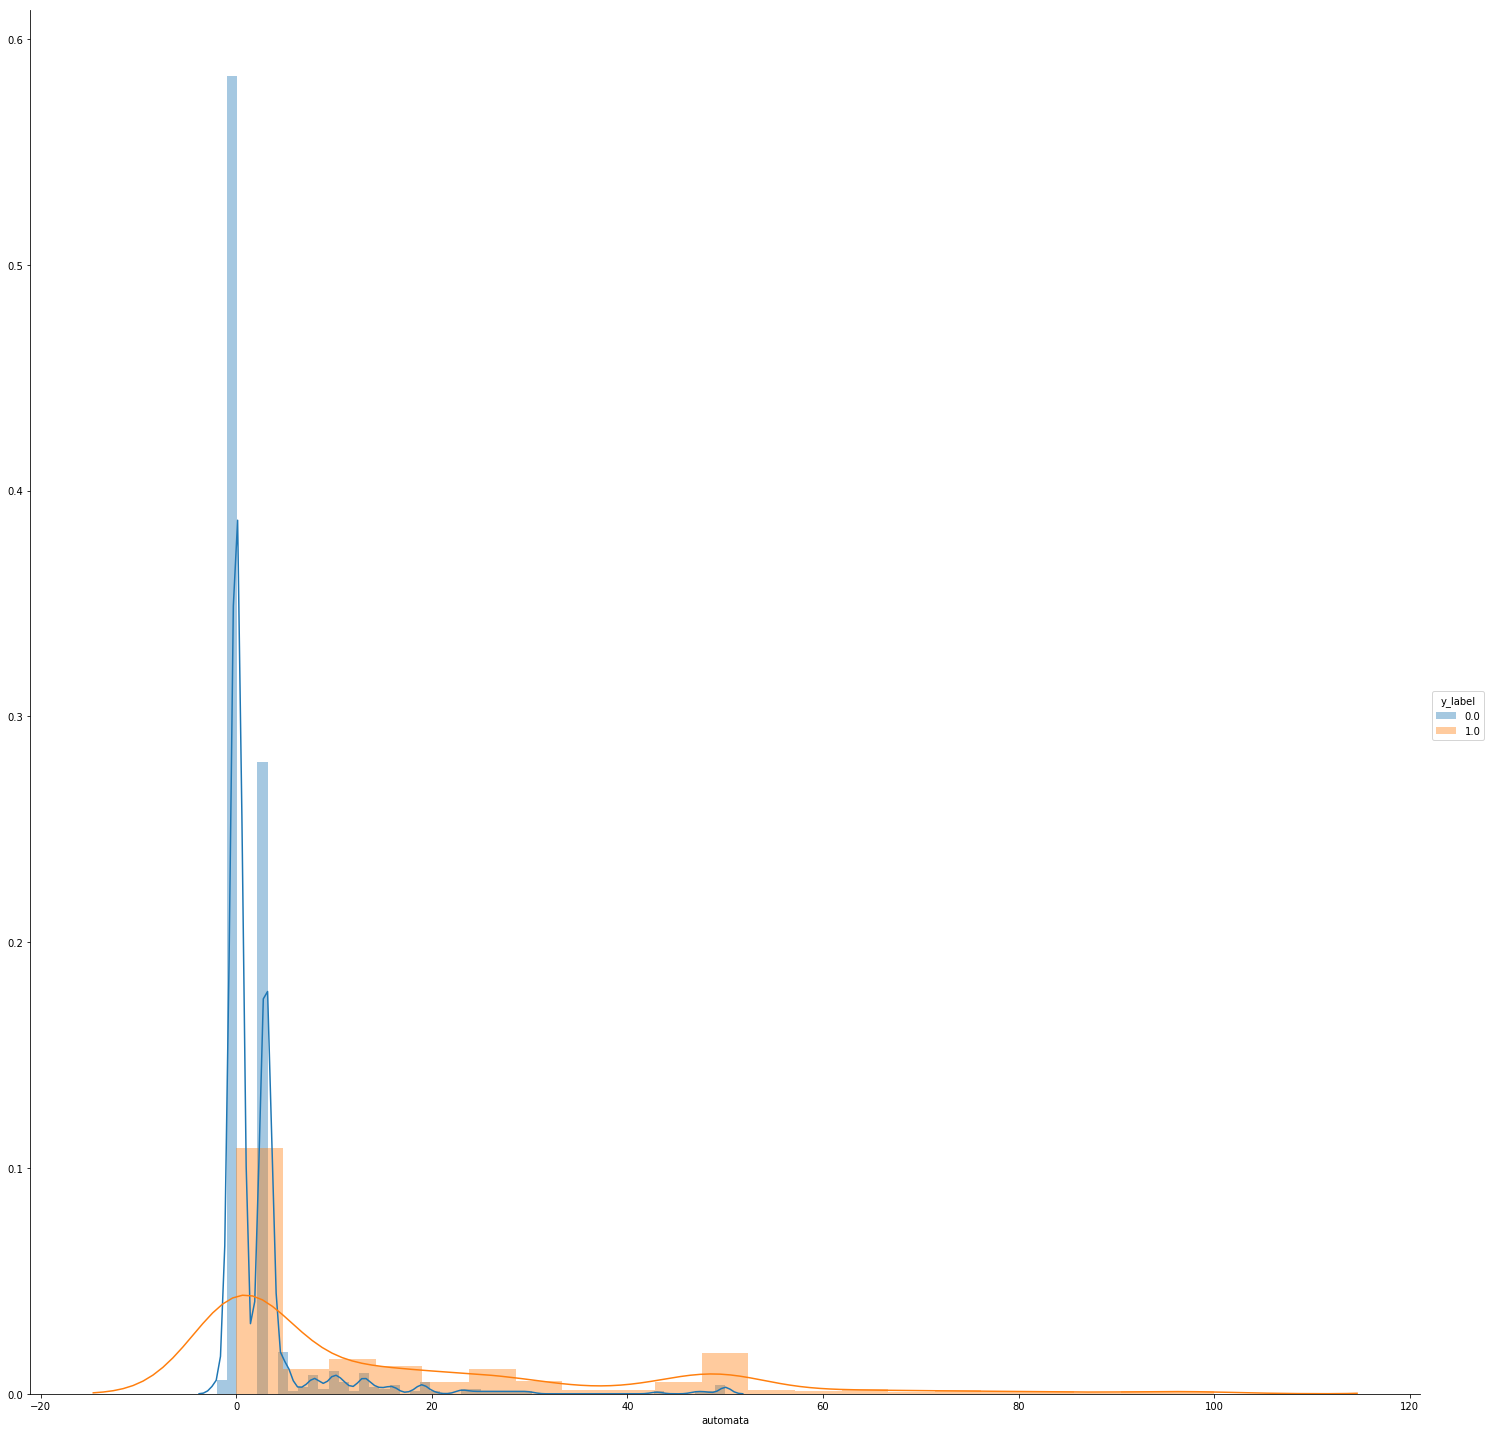

In [13]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "automata").add_legend()
plt.show()

1. this distribution follows the most of the pareto distribution in nature

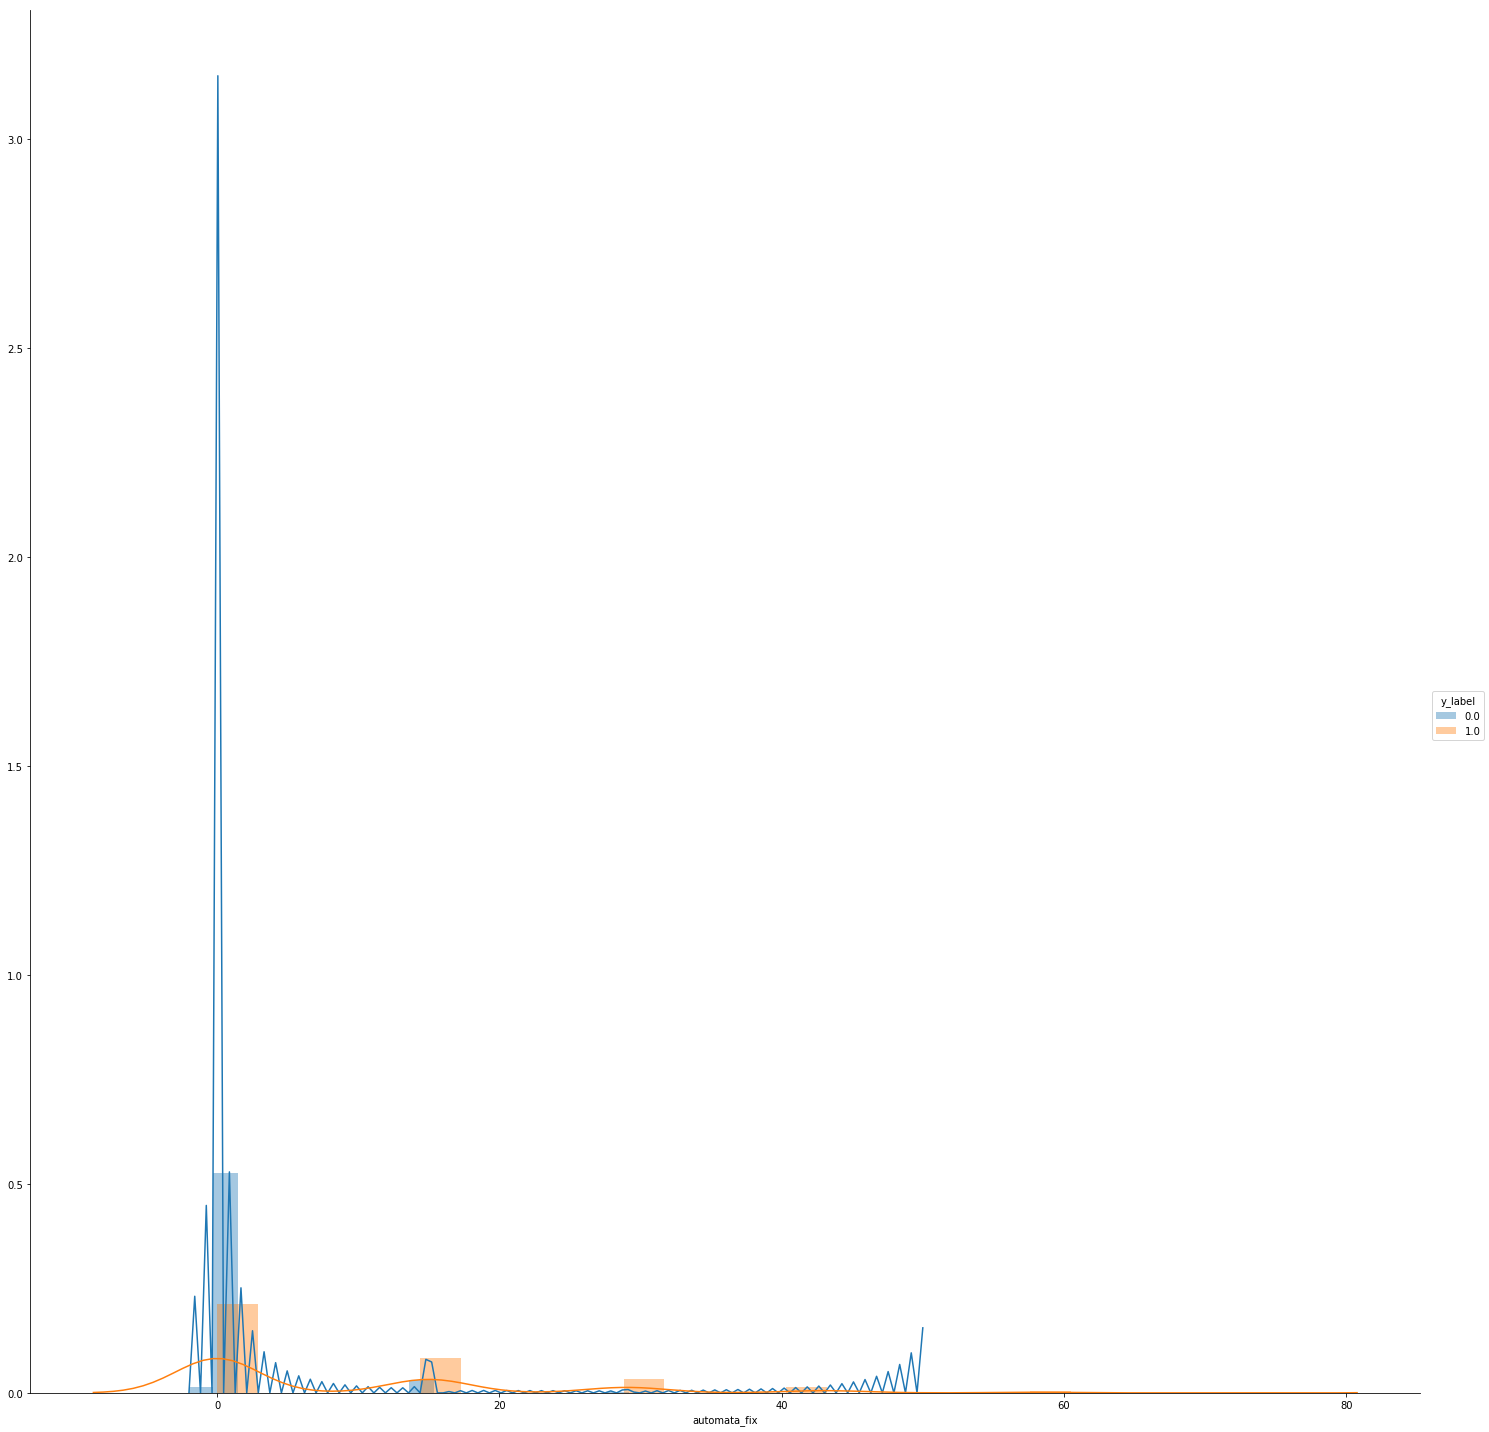

In [14]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "automata_fix").add_legend()
plt.show()

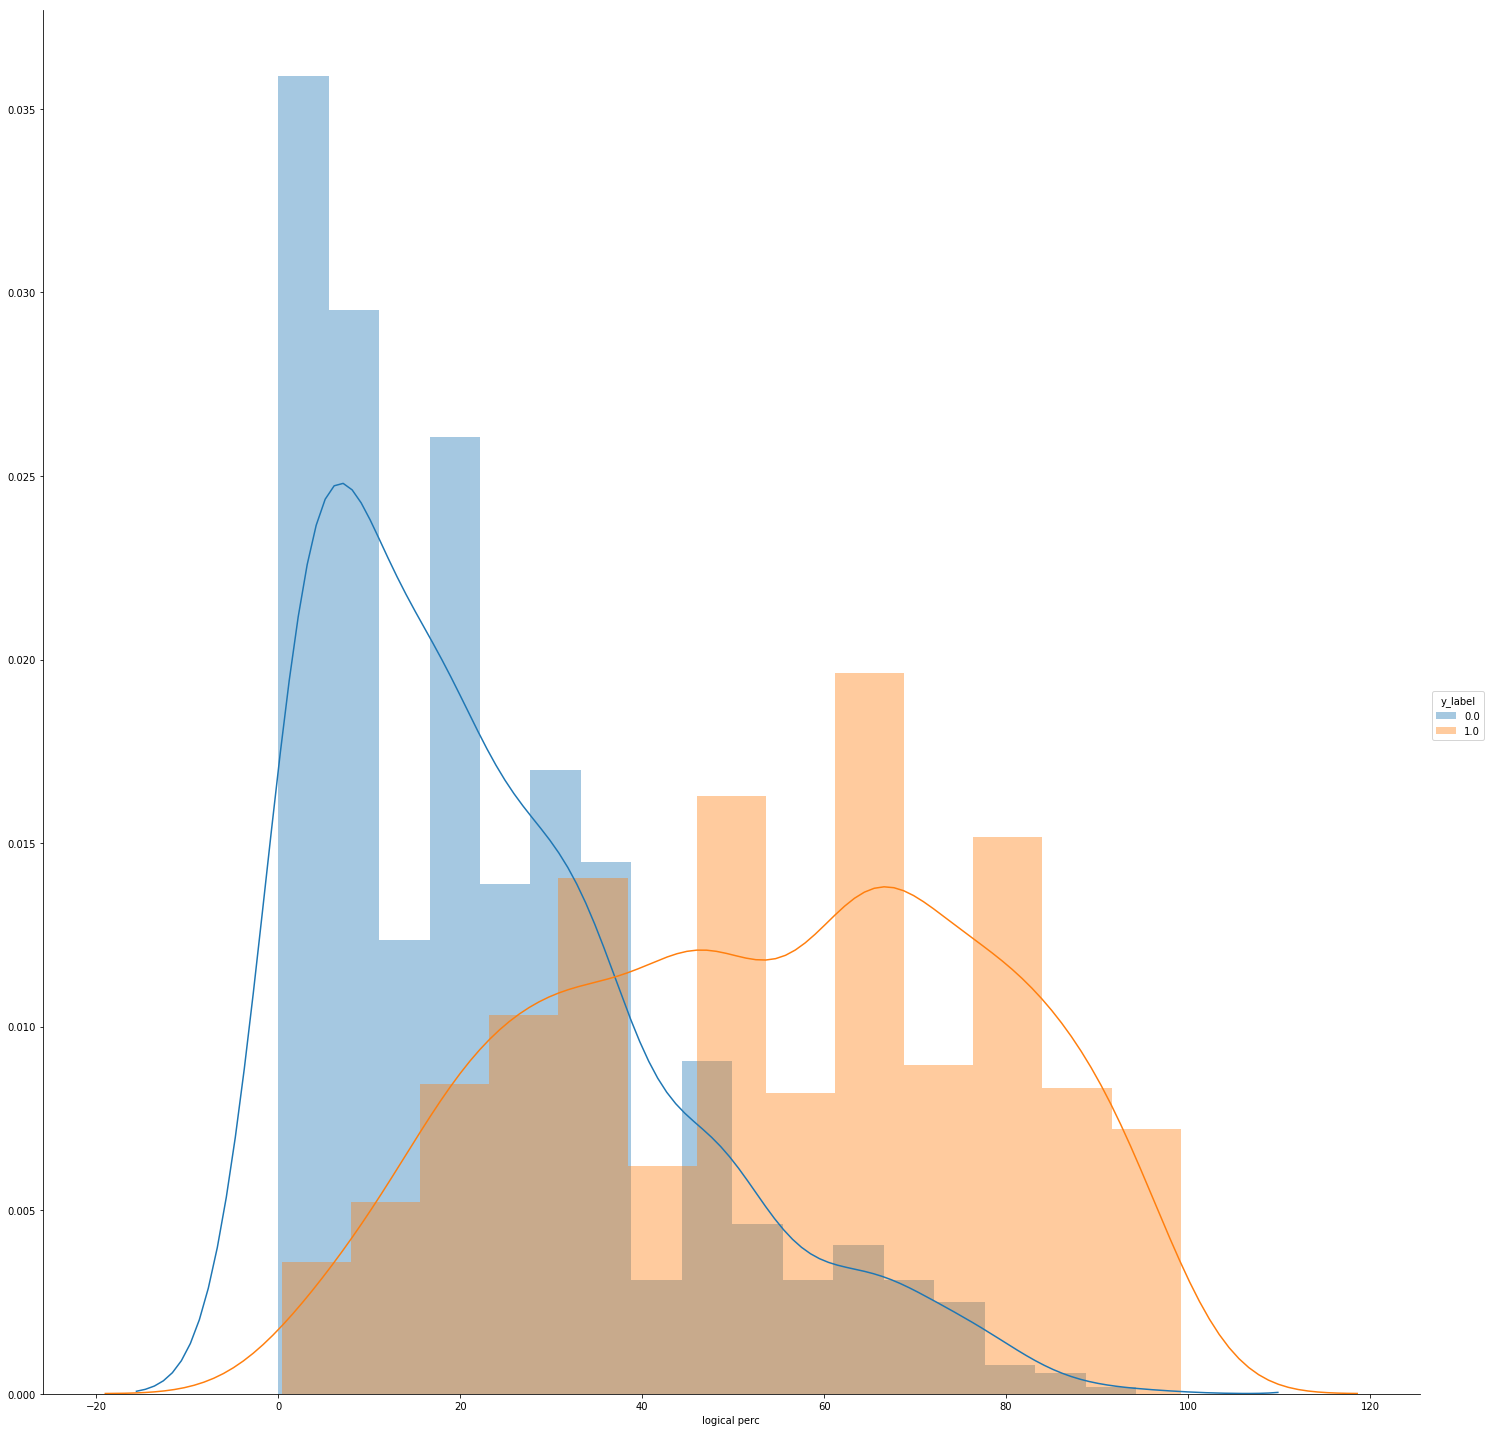

In [15]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "logical perc").add_legend()
plt.show()

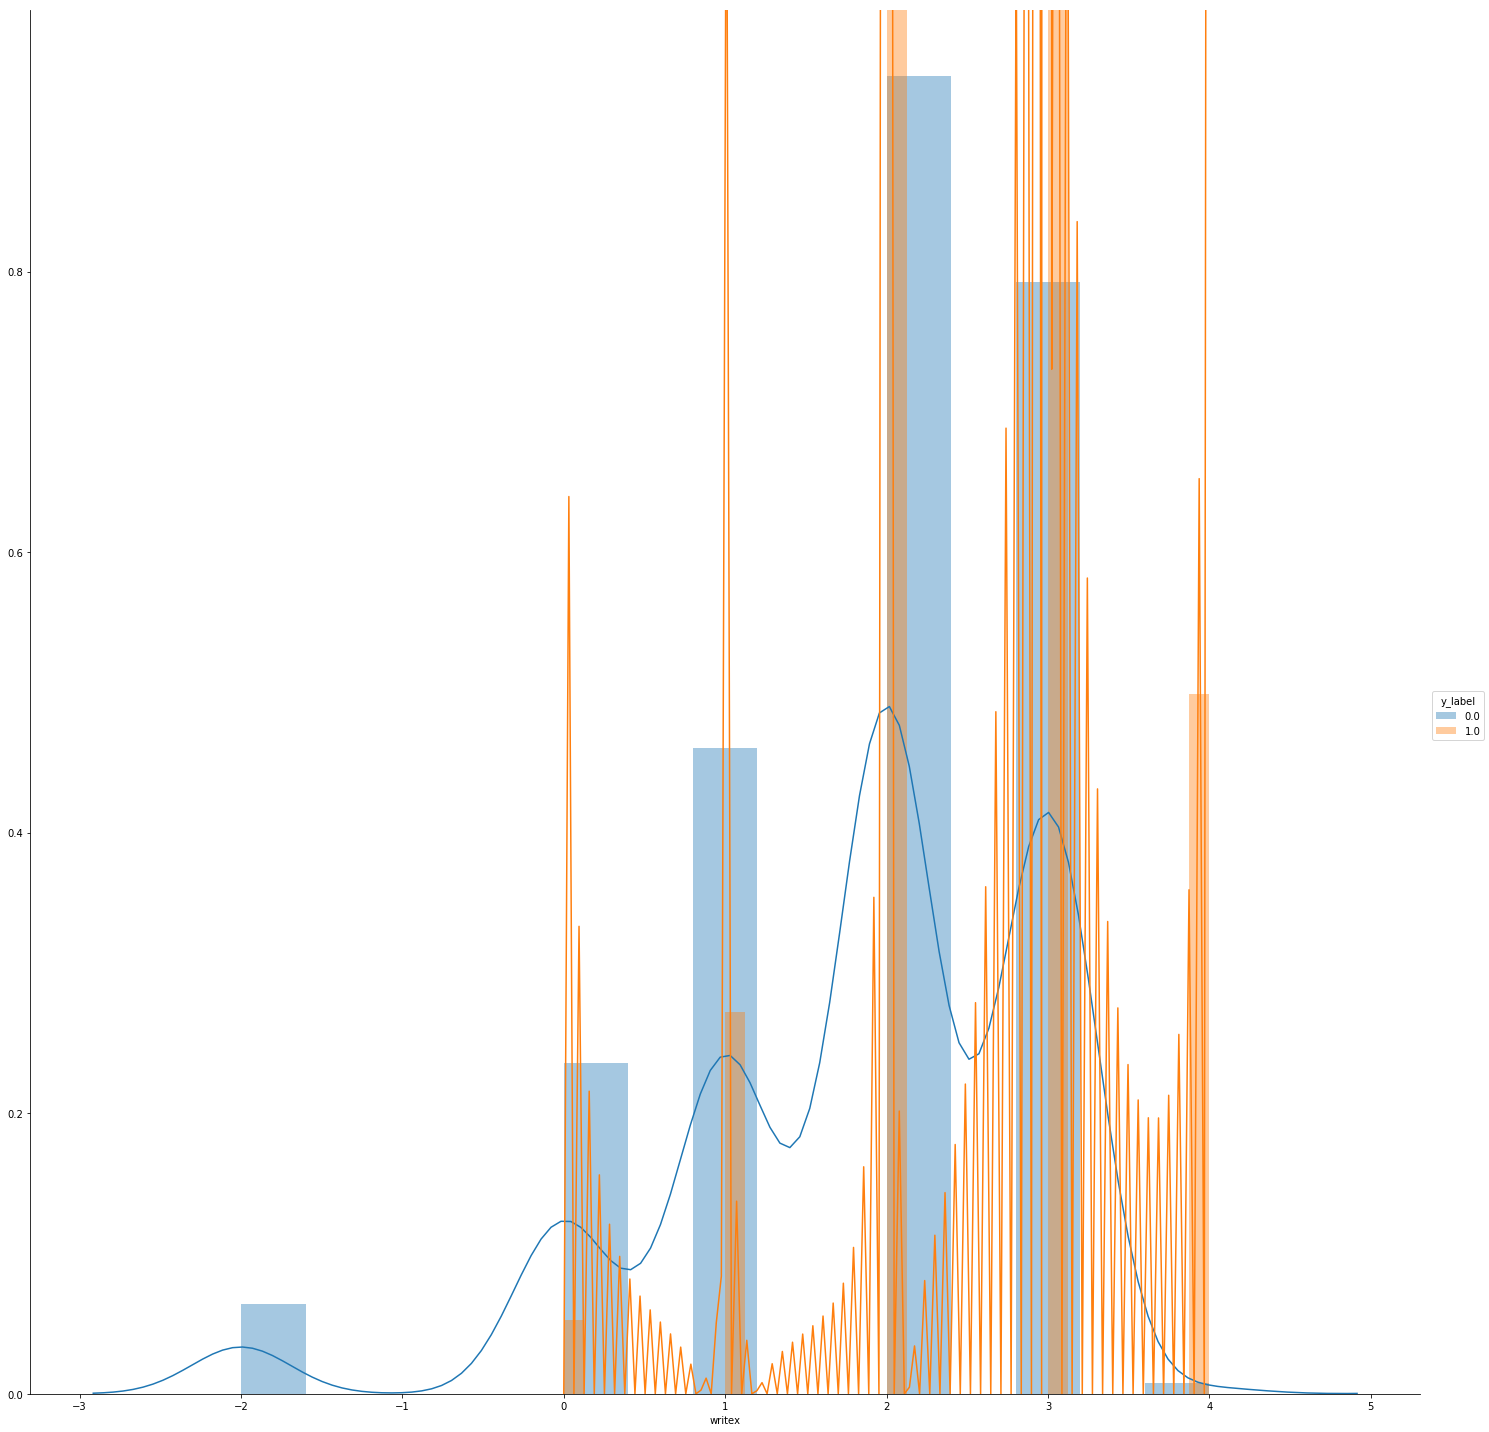

In [16]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "writex").add_legend()
plt.show()

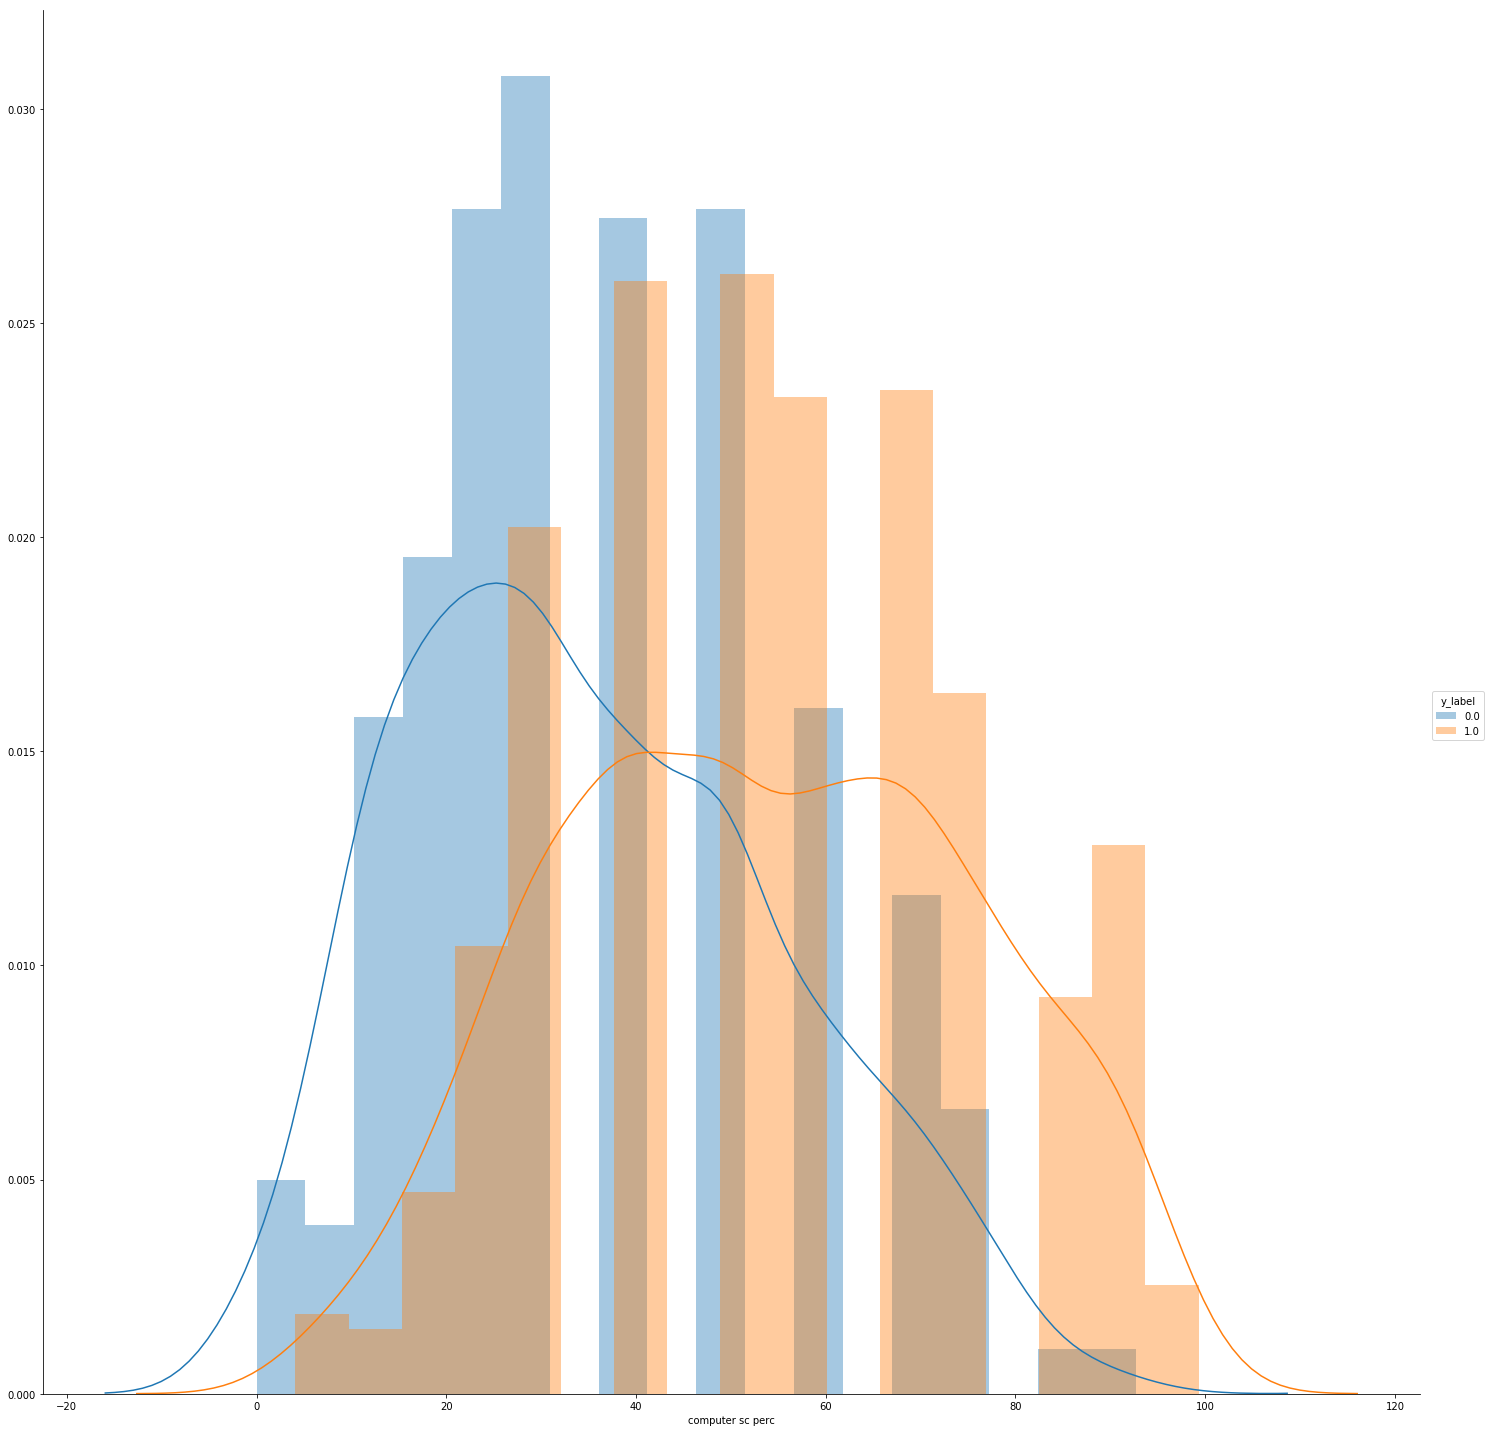

In [17]:
sns.FacetGrid(data , hue = "y_label", size = 20 ).map(sns.distplot, "computer sc perc").add_legend()
plt.show()

In [18]:
X_train , X_test , Y_train , Y_test =train_test_split(data.iloc[:,0:16] , data.iloc[:,17] , test_size = 0.2 , random_state = 1)
X_train , X_cv , Y_train , Y_cv = train_test_split(X_train ,Y_train , test_size = 0.2 , random_state = 1)


In [19]:
index = 0 
max = 0
for i in range(1,100):
    model = knn(n_neighbors = i)
    model.fit(X_train , Y_train)
    y_predict = model.predict(X_cv)
    if score(Y_cv , y_predict) > max:
        index = i
        max = score(Y_cv , y_predict)
print("optimal value of k is " , index ,"At a accuracy of ", max , "after all the analysis and hyper parameter tunning of k -NN")


optimal value of k is  75 At a accuracy of  0.865203761755 after all the analysis and hyper parameter tunning of k -NN


In [20]:
model = knn(n_neighbors = 75)
model.fit(X_train , Y_train)
y_predict = model.predict(X_test)
print("After all the analysis and hyper parameter tunning we got the accuracy of " , score(Y_test , y_predict) , " on test data")

After all the analysis and hyper parameter tunning we got the accuracy of  0.87969924812  on test data


In [21]:
x=pd.DataFrame([(84,74,41,52,32,450,43,3,350,50,400,43,402,50,320,47)],columns = ["10th" , "12th"  , "cgpa" , "automata" , "automata_fix" ,"computer sc","computer sc perc" , "writex" , "logitcal" ,  "logical perc" , "computer programming" , "computer programming perc" , "Quant" , "Quant perc" , "English" , "English Perc"])

In [22]:
model = knn(n_neighbors = 75)
model.fit(X_train , Y_train)
model.predict(x)

array([ 0.])

In [23]:
m=[10**(-3),10**(-2),10**(-1),10**(-0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6)]

In [24]:
from sklearn.linear_model import SGDClassifier as sgd

In [25]:
index = 0 
max = 0
for i in m:
    model = sgd(loss='log' , alpha = i)
    model.fit(X_train , Y_train)
    y_predict = model.predict(X_cv)
    print(y_predict)
    if score(Y_cv , y_predict) > max:
        index = i
        max = score(Y_cv , y_predict)
print("optimal value of k is " , index ,"At a accuracy of ", max , "after all the analysis and hyper parameter tunning of k -NN")


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[ 1.  1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  0.
  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  0.  1.  1.  1.
  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.
  1.  0.  1.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  1.  0.  0.  0.
  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.
  1.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  1.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.
  1.  0.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  1.  0.
  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  0.  1.  0.
  0.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.
  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  0.
  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  1.  0.
  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  1

In [26]:
model = sgd(loss='log', alpha = 0.001)
model.fit(X_train , Y_train)
y_predict = model.predict(X_test)
print("After all the analysis and hyper parameter tunning we got the accuracy of " , score(Y_test , y_predict) , " on test data")

After all the analysis and hyper parameter tunning we got the accuracy of  0.842105263158  on test data


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [27]:
model = sgd(loss='log', alpha = 0.001)
model.fit(X_train , Y_train)
y_predict = model.predict(x)
y_predict

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 1.])

In [28]:
index = 0 
max = 0
for i in m:
    model = sgd(loss='hinge' , alpha = i , penalty = 'l2')
    model.fit(X_train , Y_train)
    y_predict = model.predict(X_cv)
    if score(Y_cv , y_predict) > max:
        index = i
        max = score(Y_cv , y_predict)
print("optimal value of k is " , index ,"At a accuracy of ", max , "after all the analysis and hyper parameter tunning of k -NN")


optimal value of k is  0.001 At a accuracy of  0.855799373041 after all the analysis and hyper parameter tunning of k -NN


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [65]:
index = 0 
max = 0

for i in range(1,50):
    model = sklearn.tree.DecisionTreeClassifier(max_depth = i)
    model.fit(X_train , Y_train)
    y_predict = model.predict(X_cv)
    if score(Y_cv , y_predict) > max:
        index = i
        max = score(Y_cv , y_predict)
print("optimal value of k is " , index ,"At a accuracy of ", max , "after all the analysis and hyper parameter tunning of Decision Tree Classifier")


optimal value of k is  19 At a accuracy of  0.902821316614 after all the analysis and hyper parameter tunning of Decision Tree Classifier


In [66]:
model = sklearn.tree.DecisionTreeClassifier(max_depth = index)
model.fit(X_train , Y_train)
y_predict = model.predict(X_test)
print("After all the analysis and hyper parameter tunning we got the accuracy of " , score(Y_test , y_predict) , " on test data")

After all the analysis and hyper parameter tunning we got the accuracy of  0.882205513784  on test data


In [67]:
index = 0 
max = 0

for i in range(1,100):
    model = RandomForestClassifier(n_estimators = i)
    model.fit(X_train , Y_train)
    y_predict = model.predict(X_cv)
    if score(Y_cv , y_predict) > max:
        index = i
        max = score(Y_cv , y_predict)
print("optimal value of k is " , index ,"At a accuracy of ", max , "after all the analysis and hyper parameter tunning of k -NN")


optimal value of k is  94 At a accuracy of  0.934169278997 after all the analysis and hyper parameter tunning of k -NN


In [68]:
modelndex = RandomForestClassifier(n_estimators = index)
model.fit(X_train , Y_train)
y_predict = model.predict(X_test)
print("After all the analysis and hyper parameter tunning we got the accuracy of " , score(Y_test , y_predict) , " on test data")

After all the analysis and hyper parameter tunning we got the accuracy of  0.944862155388  on test data


In [31]:
model = sklearn.tree.DecisionTreeClassifier(max_depth = 14)
model.fit(X_train , Y_train)
y_predict = model.predict(X_cv)


In [32]:
from sklearn.tree import export_graphviz
export_graphviz(model , out_file = 'd:/file.dot')

In [43]:
import pydot
(graph ,) = pydot.graph_from_dot_file('file.dot')

In [38]:
!dir("D:\\all prOJECT\project sem 5\pract\\file.dot")

The filename, directory name, or volume label syntax is incorrect.


In [44]:
from IPython.display import Image
Image(filename = 'file.dot' )
graph.write_png('outfile.png')

ValueError: Cannot embed the 'dot' image format

In [84]:
!pip install pydot

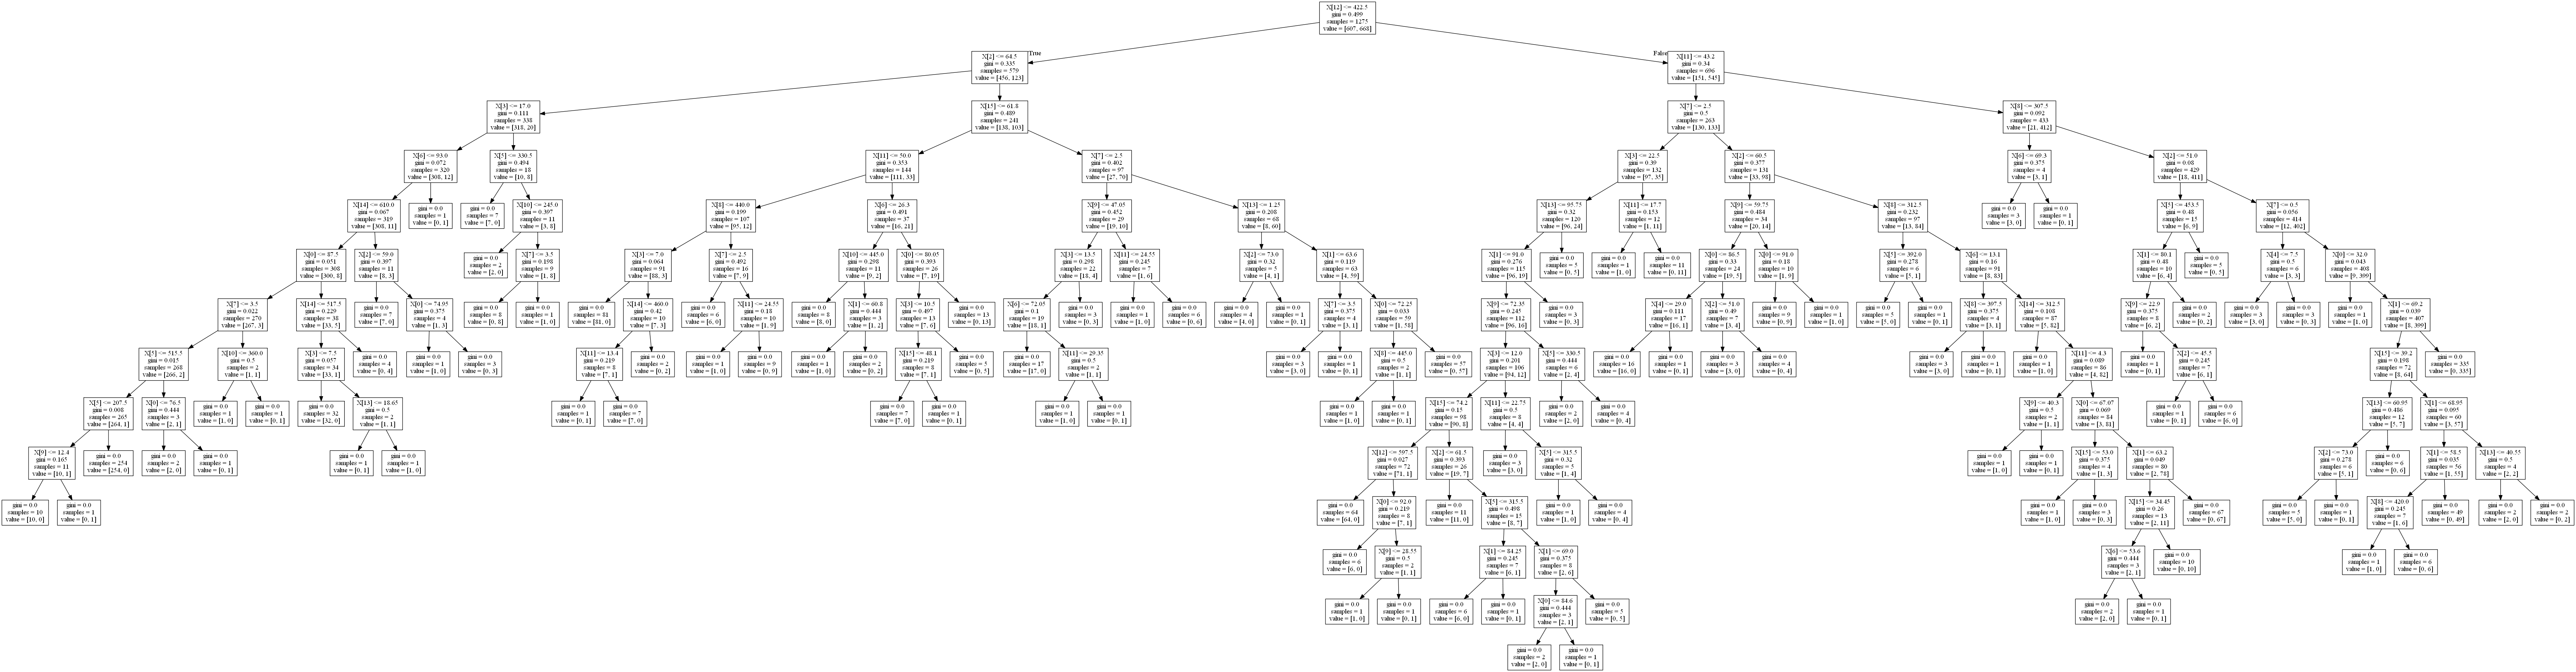

In [48]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [36]:
from sklearn.datasets import load_iris
from sklearn import tree
tree.export_graphviz(model,out_file='tree.dot')    

In [47]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(model, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf")

AttributeError: 'list' object has no attribute 'write_pdf'

In [46]:
import os     

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [40]:
!pip install Graphviz

In [41]:
!pip install graphviz